In [1]:
import pickle

with open('../trial_df2.pkl' , 'rb') as file:
  df = pickle.load(file)

df

text  label
0                                     not feel humiliate      0
1                       feel hopeless hopeful care awake      0
2                          m grab post feel greedy wrong      3
3                                    feel nostalgic know      2
4                                           feel grouchy      3
...                                                  ...    ...
19995  m have morning m come exam feel numb exam life...      0
19996  constantly worry fight nature push limit inner...      1
19997              feel important share experience thing      1
19998            truly feel passionate stay true succeed      1
19999                    feel like wanna buy cute online      1

[19920 rows x 2 columns]

In [2]:
##df['genre'] = df['genre'].replace(['fantasy', 'horror', 'family', 'scifi', 'action', 'crime','adventure', 'mystery', 'romance', 'thriller'], [0 , 1 , 2, 3 , 4,5, 6, 7, 8, 9])

In [3]:
X = df['text']
Y = df['label']

In [4]:
from sklearn.model_selection import train_test_split

X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size = 0.2)

X_train.shape , X_test.shape , Y_train.shape , Y_test.shape

((15936,), (3984,), (15936,), (3984,))

In [5]:
X_train , X_val , Y_train , Y_val = train_test_split(X_train , Y_train , test_size = 0.2)

X_train.shape , X_val.shape , Y_train.shape , Y_val.shape

((12748,), (3188,), (12748,), (3188,))

In [6]:
X_train = list(X_train)
Y_train = list(Y_train)
X_test = list(X_test)
Y_test = list(Y_test)
X_val = list(X_val)
Y_val = list(Y_val)

In [7]:
from transformers import TFDistilBertForSequenceClassification , DistilBertTokenizer

model = TFDistilBertForSequenceClassification.from_pretrained('distilbert-base-uncased' , num_labels = 6)

tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFDistilBertForSequenceClassification: ['vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_projector.bias', 'vocab_transform.bias', 'vocab_transform.weight']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFDistilBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classifier.weight', 'classifier.bias']
You should 

In [8]:
train_encodings = tokenizer(X_train , truncation = True , padding= True)
test_encodings = tokenizer(X_test , truncation = True , padding = True)
val_encodings = tokenizer(X_val , truncation = True , padding = True)

In [9]:
'''import tensorflow as tf
train_dataset = tf.data.Dataset.from_tensor_slices((
    {key: value for key, value in train_encodings.items() if key != 'token_type_ids'},
    Y_train
)).shuffle(buffer_size=100).batch(batch_size=16)'''

"import tensorflow as tf\ntrain_dataset = tf.data.Dataset.from_tensor_slices((\n    {key: value for key, value in train_encodings.items() if key != 'token_type_ids'},\n    Y_train\n)).shuffle(buffer_size=100).batch(batch_size=16)"

In [9]:
import tensorflow as tf

optimizerr = tf.keras.optimizers.AdamW(learning_rate=3e-5)
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    Y_train
)).shuffle(buffer_size=100).batch(batch_size=128)

test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    Y_test
)).shuffle(buffer_size=100).batch(batch_size=128)

val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    Y_val
)).shuffle(buffer_size=100).batch(batch_size=128)

In [11]:
model.compile(optimizer = optimizerr , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [12]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint('C:/Users/Tridebasis/sentiment_analysis/best_model' , monitor = 'val_accuracy', save_best_only = True , mode = 'max')

In [13]:
model.fit(train_dataset ,validation_data = val_dataset , epochs = 10 , callbacks = [checkpoint])

Epoch 1/10


100/100 [==============================] - ETA: 0s - loss: 1.9771 - accuracy: 0.3393WARNING:tensorflow:From C:\Users\Tridebasis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\saving\legacy\saved_model\save_impl.py:66: The name tf.logging.warning is deprecated. Please use tf.compat.v1.logging.warning instead.

INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


100/100 [==============================] - 827s 8s/step - loss: 1.9771 - accuracy: 0.3393 - val_loss: 1.5496 - val_accuracy: 0.4188
Epoch 2/10
100/100 [==============================] - ETA: 0s - loss: 1.3644 - accuracy: 0.5202WARNING:tensorflow:Skipping full serialization of Keras layer <keras.src.layers.regularization.dropout.Dropout object at 0x000001CC001298D0>, because it is not built.


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


100/100 [==============================] - 758s 8s/step - loss: 1.3644 - accuracy: 0.5202 - val_loss: 1.1670 - val_accuracy: 0.5960
Epoch 3/10
100/100 [==============================] - ETA: 0s - loss: 0.9558 - accuracy: 0.6818WARNING:tensorflow:Skipping full serialization of Keras layer <keras.src.layers.regularization.dropout.Dropout object at 0x000001CC001298D0>, because it is not built.


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


100/100 [==============================] - 757s 8s/step - loss: 0.9558 - accuracy: 0.6818 - val_loss: 0.8583 - val_accuracy: 0.7051
Epoch 4/10
100/100 [==============================] - ETA: 0s - loss: 0.7156 - accuracy: 0.7953WARNING:tensorflow:Skipping full serialization of Keras layer <keras.src.layers.regularization.dropout.Dropout object at 0x000001CC001298D0>, because it is not built.


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


100/100 [==============================] - 762s 8s/step - loss: 0.7156 - accuracy: 0.7953 - val_loss: 0.5535 - val_accuracy: 0.8441
Epoch 5/10
100/100 [==============================] - ETA: 0s - loss: 0.4960 - accuracy: 0.8765WARNING:tensorflow:Skipping full serialization of Keras layer <keras.src.layers.regularization.dropout.Dropout object at 0x000001CC001298D0>, because it is not built.


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


100/100 [==============================] - 757s 8s/step - loss: 0.4960 - accuracy: 0.8765 - val_loss: 0.4312 - val_accuracy: 0.8711
Epoch 6/10
100/100 [==============================] - ETA: 0s - loss: 0.6408 - accuracy: 0.8134WARNING:tensorflow:Skipping full serialization of Keras layer <keras.src.layers.regularization.dropout.Dropout object at 0x000001CC001298D0>, because it is not built.


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


100/100 [==============================] - 759s 8s/step - loss: 0.6408 - accuracy: 0.8134 - val_loss: 0.4206 - val_accuracy: 0.8949
Epoch 7/10
100/100 [==============================] - 732s 7s/step - loss: 0.8268 - accuracy: 0.6709 - val_loss: 0.5739 - val_accuracy: 0.8864
Epoch 8/10
100/100 [==============================] - ETA: 0s - loss: 0.7509 - accuracy: 0.8673WARNING:tensorflow:Skipping full serialization of Keras layer <keras.src.layers.regularization.dropout.Dropout object at 0x000001CC001298D0>, because it is not built.


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


INFO:tensorflow:Assets written to: C:/Users/Tridebasis/sentiment_analysis\best_model\assets


100/100 [==============================] - 758s 8s/step - loss: 0.7509 - accuracy: 0.8673 - val_loss: 0.5001 - val_accuracy: 0.8993
Epoch 9/10
100/100 [==============================] - 729s 7s/step - loss: 1.2414 - accuracy: 0.7489 - val_loss: 1.5401 - val_accuracy: 0.7437
Epoch 10/10
100/100 [==============================] - 729s 7s/step - loss: 1.5713 - accuracy: 0.5295 - val_loss: 1.5825 - val_accuracy: 0.4984


In [11]:
import tensorflow as tf
from transformers import TFDistilBertForSequenceClassification

model = tf.keras.models.load_model('C:/Users/Tridebasis/sentiment_analysis/best_model', custom_objects={"TFDistilBertForSequenceClassification": TFDistilBertForSequenceClassification})

model.evaluate(test_dataset)



32/32 [==============================] - 83s 2s/step - loss: 0.5414 - accuracy: 0.8956


[0.5413527488708496, 0.8955823183059692]

In [21]:
import numpy as np
prediction_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings)
)).batch(batch_size=128)

predictions = model.predict(prediction_dataset)

logits = predictions.logits

probs = tf.nn.softmax(logits, axis=-1)

Y_pred = tf.argmax(probs, axis=-1)

32/32 [==============================] - 75s 2s/step


In [29]:
from sklearn.metrics import classification_report , confusion_matrix

print(classification_report(Y_test , Y_pred))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1168
           1       0.94      0.92      0.93      1323
           2       0.78      0.85      0.82       342
           3       0.95      0.85      0.90       538
           4       0.86      0.92      0.89       475
           5       0.85      0.71      0.77       138

    accuracy                           0.90      3984
   macro avg       0.88      0.87      0.87      3984
weighted avg       0.91      0.90      0.90      3984



<Axes: >

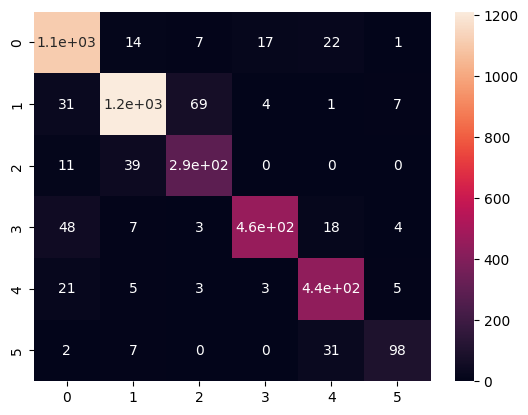

In [31]:
import seaborn as sns

cm = confusion_matrix(Y_test , Y_pred)
sns.heatmap(cm , annot = True)